In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df= pd.read_csv(r"D:\T\test_codeEVT\ATTC_Data\merged_data_ATTC.csv")

Text(0.5, 1.0, 'ATTC vs Time')

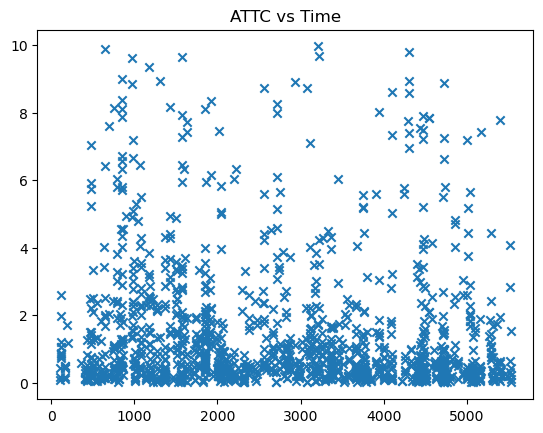

In [4]:
plt.scatter(df[df['ATTC']<10]['TIMESTAMP'],df[df['ATTC']<10]['ATTC'],marker='x')
plt.title('ATTC vs Time')

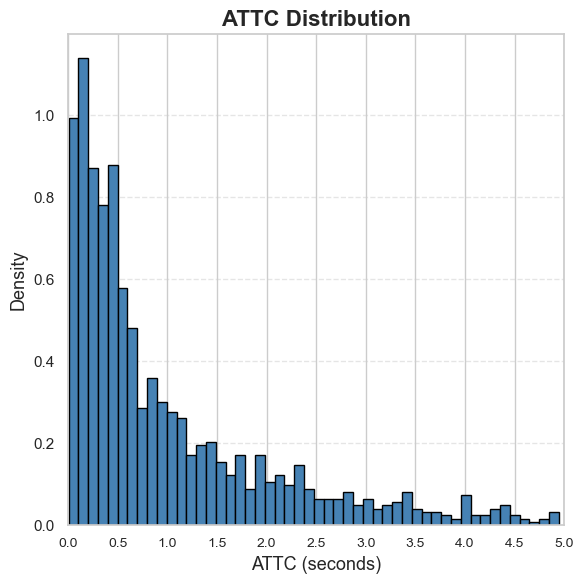

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter data
filtered_data = df[(df['ATTC'] < 5)]['ATTC']

# Apply Seaborn style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(6, 6))
plt.hist(filtered_data, bins=50, color='steelblue', edgecolor='black', density=True)

# Titles and labels
plt.title('ATTC Distribution', fontsize=16, weight='bold')
plt.xlabel('ATTC (seconds)', fontsize=13)
plt.ylabel('Density', fontsize=13)

# X-axis ticks and limits
plt.xticks(np.arange(0, 8.1, 0.5), rotation=0, fontsize=10)
plt.xlim(0, 5)

# Grid and layout
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


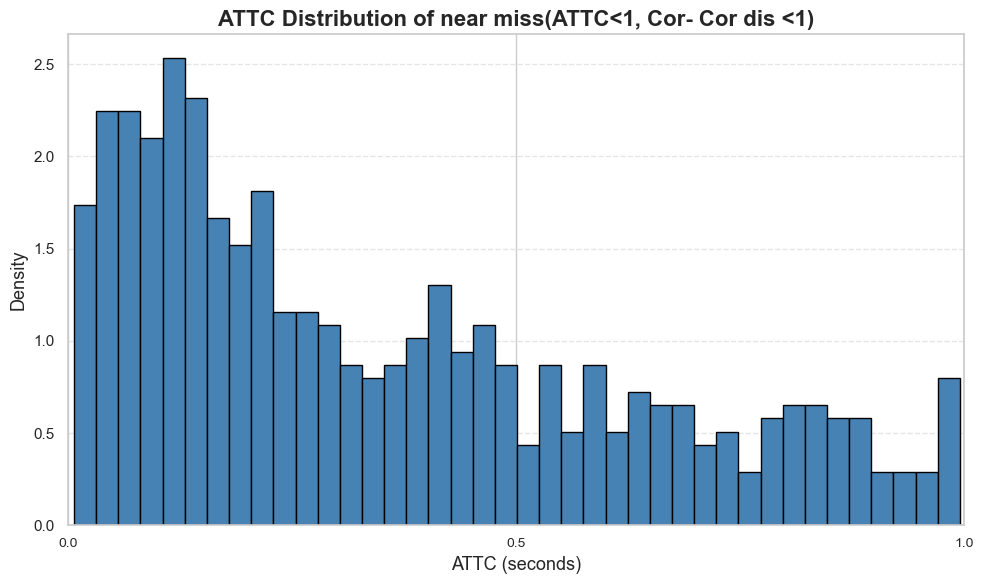

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter data
filtered_data = df[(df['ATTC'] < 3) & (df['MIN_COR_DIS'] < 1)]['ATTC']

# Apply Seaborn style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=40, color='steelblue', edgecolor='black', density=True)

# Titles and labels
plt.title('ATTC Distribution of near miss(ATTC<1, Cor- Cor dis <1)', fontsize=16, weight='bold')
plt.xlabel('ATTC (seconds)', fontsize=13)
plt.ylabel('Density', fontsize=13)

# X-axis ticks and limits
plt.xticks(np.arange(0, 8.1, 0.5), rotation=0, fontsize=10)
plt.xlim(0, 1)

# Grid and layout
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


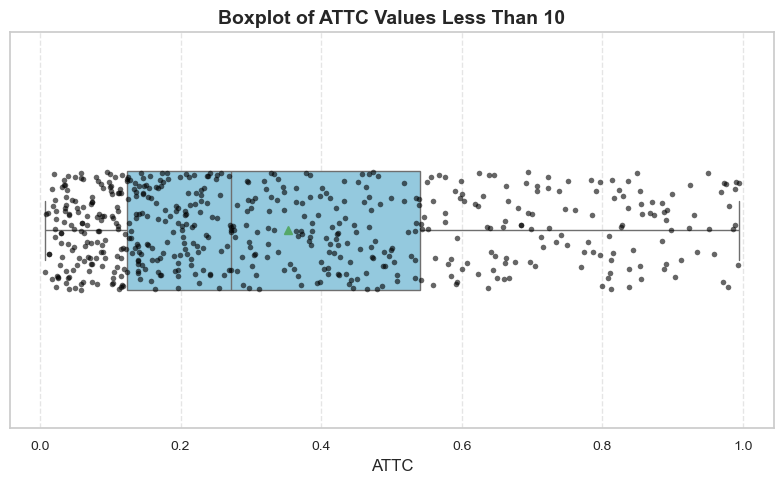

In [51]:


# Optional: use a nice Seaborn theme
sns.set(style="whitegrid")

# Filter the data
filtered_data = df[(df['ATTC'] < 1)&(df['MIN_COR_DIS'] < 1)]['ATTC']

# Create the plot
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x=filtered_data, width=0.3, color='skyblue', showmeans=True)
sns.stripplot(x=filtered_data, color='black', size=4, jitter=0.15, alpha=0.6)

# Add titles and labels
plt.title('Boxplot of ATTC Values Less Than 10', fontsize=14, weight='bold')
plt.xlabel('ATTC', fontsize=12)
plt.tick_params(axis='x', labelsize=10)

# Optional: add grid lines
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


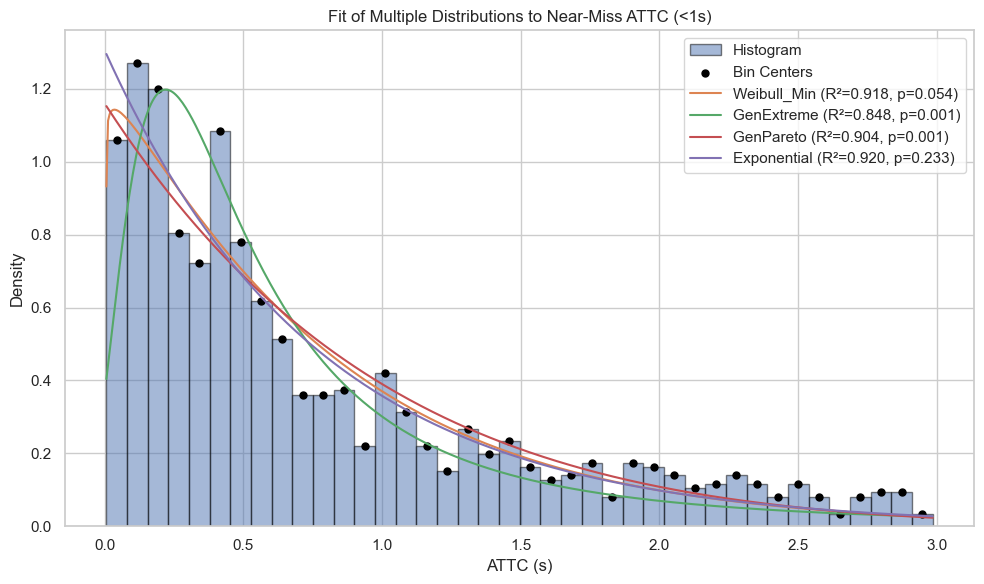

=== Fit Statistics ===
Weibull_Min:
  R²     = 0.9182
  p-value= 0.0541
  Params = [1.034  0.0067 0.7825]

GenExtreme:
  R²     = 0.8477
  p-value= 0.0009
  Params = [-0.5309  0.3526  0.3466]

GenPareto:
  R²     = 0.9036
  p-value= 0.0010
  Params = [-0.1211  0.0068  0.8677]

Exponential:
  R²     = 0.9200
  p-value= 0.2333
  Params = [0.0068 0.7719]



In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme, genpareto, weibull_min, expon, kstest

# Step 1: Filter near-miss ATTC data
nearmiss = df[(df['ATTC'] < 3)]['ATTC']

# Step 2: Histogram info
bins = 40
y_obser, bin_edges = np.histogram(nearmiss, bins=bins, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
x_vals = np.linspace(nearmiss.min(), nearmiss.max(), 500)

# R² function
def r2_score(y_pred, y_obs):
    ss_res = np.sum((y_obs - y_pred) ** 2)
    ss_tot = np.sum((y_obs - np.mean(y_obs)) ** 2)
    return 1 - (ss_res / ss_tot) if ss_tot != 0 else np.nan

# Distributions to test
distributions = {
    'Weibull_Min': weibull_min,
    'GenExtreme': genextreme,
    'GenPareto': genpareto,
    'Exponential': expon
}

# Store results
fit_results = {}

for name, dist in distributions.items():
    try:
        # Fit distribution
        params = dist.fit(nearmiss)
        # PDF for bin centers (for R²)
        pdf_at_bins = dist.pdf(bin_centers, *params)
        # PDF for smooth curve
        pdf_at_x = dist.pdf(x_vals, *params)
        # R² score
        r2 = r2_score(pdf_at_bins, y_obser)
        # K-S test (p-value)
        ks_stat, p_val = kstest(nearmiss, dist.cdf, args=params)
        # Store
        fit_results[name] = {
            'params': params,
            'pdf': pdf_at_x,
            'r2': r2,
            'p_val': p_val
        }
    except Exception as e:
        print(f"{name} fitting failed: {e}")

# Step 3: Plot
plt.figure(figsize=(10, 6))
plt.hist(nearmiss, bins=bins, density=True, alpha=0.5, edgecolor='black', label='Histogram')
plt.scatter(bin_centers, y_obser, color='black', s=25, label='Bin Centers')

for name, res in fit_results.items():
    plt.plot(x_vals, res['pdf'], label=f"{name} (R²={res['r2']:.3f}, p={res['p_val']:.3f})")

plt.title("Fit of Multiple Distributions to Near-Miss ATTC (<1s)")
plt.xlabel("ATTC (s)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Print summary table
print("=== Fit Statistics ===")
for name, res in fit_results.items():
    print(f"{name}:")
    print(f"  R²     = {res['r2']:.4f}")
    print(f"  p-value= {res['p_val']:.4f}")
    print(f"  Params = {np.round(res['params'], 4)}\n")



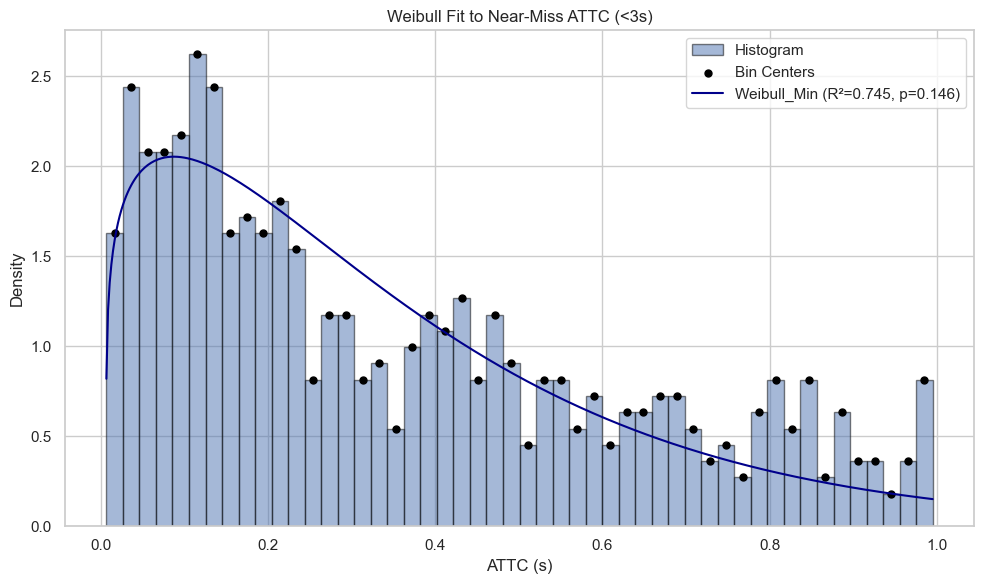

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme, genpareto, weibull_min, expon, kstest

# Step 1: Filter near-miss ATTC data
nearmiss = df[(df['ATTC'] < 1) & (df['MIN_COR_DIS'] < 1)]['ATTC']

# Step 2: Histogram info
bins = 50
y_obser, bin_edges = np.histogram(nearmiss, bins=bins, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
x_vals = np.linspace(nearmiss.min(), nearmiss.max(), 500)

# R² function
def r2_score(y_pred, y_obs):
    ss_res = np.sum((y_obs - y_pred) ** 2)
    ss_tot = np.sum((y_obs - np.mean(y_obs)) ** 2)
    return 1 - (ss_res / ss_tot) if ss_tot != 0 else np.nan

# Distributions to test
distributions = {
    'Weibull_Min': weibull_min,
    'GenExtreme': genextreme,
    'GenPareto': genpareto,
    'Exponential': expon
}

# Store results
fit_results = {}

for name, dist in distributions.items():
    try:
        # Fit distribution
        params = dist.fit(nearmiss)
        # PDF for bin centers (for R²)
        pdf_at_bins = dist.pdf(bin_centers, *params)
        # PDF for smooth curve
        pdf_at_x = dist.pdf(x_vals, *params)
        # R² score
        r2 = r2_score(pdf_at_bins, y_obser)
        # K-S test (p-value)
        ks_stat, p_val = kstest(nearmiss, dist.cdf, args=params)
        # Store
        fit_results[name] = {
            'params': params,
            'pdf': pdf_at_x,
            'r2': r2,
            'p_val': p_val
        }
    except Exception as e:
        print(f"{name} fitting failed: {e}")
# Step 3: Plot - Only Weibull_Min
plt.figure(figsize=(10, 6))
plt.hist(nearmiss, bins=bins, density=True, alpha=0.5, edgecolor='black', label='Histogram')
plt.scatter(bin_centers, y_obser, color='black', s=25, label='Bin Centers')

# Plot only Weibull_Min
weibull_result = fit_results.get('Weibull_Min')
if weibull_result:
    plt.plot(x_vals, weibull_result['pdf'], color='darkblue',
             label=f"Weibull_Min (R²={weibull_result['r2']:.3f}, p={weibull_result['p_val']:.3f})")

plt.title("Weibull Fit to Near-Miss ATTC (<3s)")
plt.xlabel("ATTC (s)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


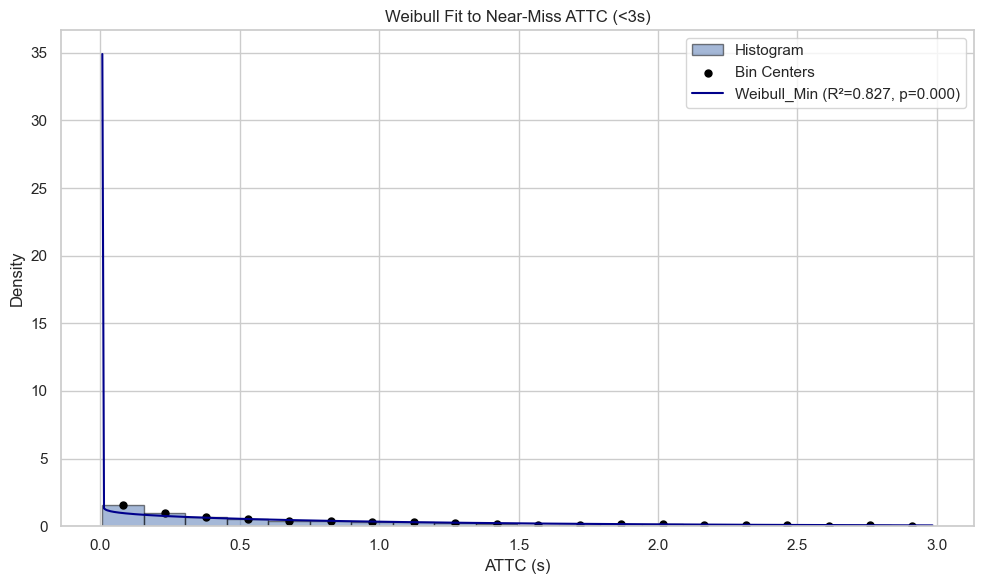

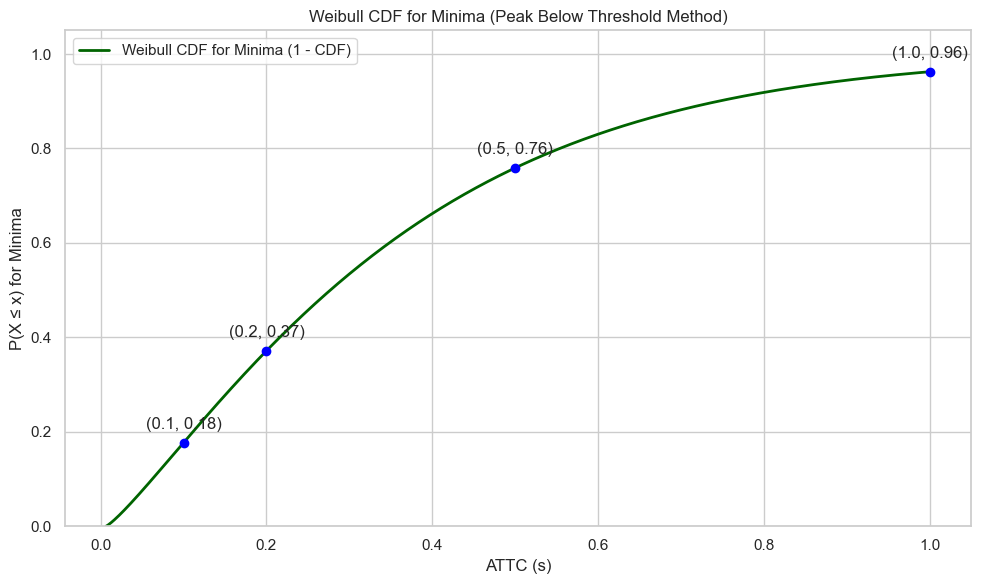

Weibull Params: shape=1.1958, loc=0.0064, scale=0.3675


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# 1. Get ATTC values from near-miss region (extremes = minima)
attc_data = df[(df['ATTC'] < 1) & (df['MIN_COR_DIS'] < 1)]['ATTC']

# 2. Fit Weibull distribution
shape, loc, scale = weibull_min.fit(attc_data)

# 3. Generate x-axis values
x_vals = np.linspace(attc_data.min(), attc_data.max(), 500)
cdf_raw = weibull_min.cdf(x_vals, shape, loc=loc, scale=scale)
cdf_minima = cdf_raw  # For minima modeling

# 4. Mark specific points
x_marks = [0.1, 0.2, 0.5, 1.0]
y_marks = weibull_min.cdf(x_marks, shape, loc=loc, scale=scale)

# 5. Plot
plt.figure(figsize=(10, 6))
plt.plot(x_vals, cdf_minima, label='Weibull CDF for Minima (1 - CDF)', color='darkgreen', linewidth=2)
plt.scatter(x_marks, y_marks, color='blue', zorder=5)

# Add annotated points
for x, y in zip(x_marks, y_marks):
    plt.annotate(f'({x:.1f}, {y:.2f})', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# 6. Styling
plt.xlabel('ATTC (s)')
plt.ylabel('P(X ≤ x) for Minima')
plt.title('Weibull CDF for Minima (Peak Below Threshold Method)')
plt.grid(True)
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()
plt.show()

# Print parameters
print(f"Weibull Params: shape={shape:.4f}, loc={loc:.4f}, scale={scale:.4f}")



- % probability that ATTC is less than 0.1 sc is 18 %
- % probability that ATTC is less than 0.2 sc is 37 %



In [11]:
from scipy.stats import genextreme

# Fit to minima by negating the data
c_gev, loc_gev, scale_gev = genextreme.fit(filtered_data )

edges = [3.0, 2.5, 2.0, 1.5, 1.0, 0.5, 0.1]
probabilities = []

for i in range(len(edges)-1):
    x, y = edges[i+1], edges[i]  # x < y
    cdf_x = genextreme.cdf(x, c_gev, loc=loc_gev, scale=scale_gev)
    cdf_y = genextreme.cdf(y, c_gev, loc=loc_gev, scale=scale_gev)
    prob = -cdf_x +cdf_y
    probabilities.append((f"{x:.1f}–{y:.1f}", prob * 100))

# Print results
for label, prob in probabilities:
    print(f"{label}: {prob:.2f}%")


2.5–3.0: 2.16%
2.0–2.5: 3.11%
1.5–2.0: 4.87%
1.0–1.5: 8.65%
0.5–1.0: 19.17%
0.1–0.5: 39.82%


In [ ]:
# STEP 1: Filter near-miss data
near_miss_df = df[(df['ATTC'] < 3) & (df['MIN_COR_DIS'] < 1]

# STEP 2: Drop duplicate pairs (PED_ID, VEH_ID)
unique_near_miss_pairs = near_miss_df[['PED_ID', 'VEH_ID', 'TYPE']].drop_duplicates()

# STEP 3: Total unique near-miss pairs
total_unique = len(unique_near_miss_pairs)
print(f"Total unique near-miss events: {total_unique}")

# STEP 4: Near-miss counts by vehicle type
near_miss_by_type = unique_near_miss_pairs.groupby('TYPE').size().reset_index(name='NearMiss_Count')
print("\nNear-miss count by vehicle type:")
print(near_miss_by_type)
near_miss_by_type.to_csv(r"D:\T/near_miss_by_type.csv", index=False)


Total unique near-miss events: 321

Near-miss count by vehicle type:
           TYPE  NearMiss_Count
0           Bus               5
1           Car              41
2   Light Truck              10
3    Motorcycle             119
4       Tractor               1
5           Van               1
6  Auto-Rikshaw             144


In [11]:
# STEP 1: Filter relevant data
near_miss_df = df[(df['ATTC'] < 3)& (df['MIN_COR_DIS'] < 1)].copy()

# STEP 2: Drop duplicate pedestrian–vehicle ID pairs
unique_near_miss_pairs = near_miss_df[['PED_ID', 'VEH_ID', 'TYPE', 'ATTC']].drop_duplicates(subset=['PED_ID', 'VEH_ID'])

# STEP 3: Total unique near-miss pairs
total_conflicts = len(unique_near_miss_pairs)
print(f"Total unique near-miss conflicts: {total_conflicts}")

# STEP 4: Categorize conflict severity
def classify_conflict(attc):
    if attc <= 0.5:
        return 'Severe'
    elif attc <= 1.5:
        return 'Moderate'
    else:
        return 'Minor'

unique_near_miss_pairs['Conflict_Level'] = unique_near_miss_pairs['ATTC'].apply(classify_conflict)

# STEP 5: Count conflicts by severity
conflict_counts = unique_near_miss_pairs['Conflict_Level'].value_counts().reset_index()
conflict_counts.columns = ['Conflict_Level', 'Count']

print("\nConflict classification counts:")
print(conflict_counts)

# (Optional) Save to CSV
conflict_counts.to_csv(r"D:\T\conflict_level_counts.csv", index=False)


Total unique near-miss conflicts: 321

Conflict classification counts:
  Conflict_Level  Count
0         Severe    185
1       Moderate     84
2          Minor     52


In [30]:
from scipy.stats import genextreme

# Fit to filtered data (no negation since we're modeling small ATTC values directly)
c_gev, loc_gev, scale_gev = genextreme.fit(filtered_data)
edges = [3.0, 2.5, 2.0, 1.5, 1.0, 0.5, 0.1]  # seconds
probabilities = []

for i in range(len(edges)-1):
    x, y = edges[i+1], edges[i]  # x < y
    cdf_x = genextreme.cdf(x, c_gev, loc=loc_gev, scale=scale_gev)
    cdf_y = genextreme.cdf(y, c_gev, loc=loc_gev, scale=scale_gev)
    prob = cdf_y - cdf_x  # probability in the range x–y
    probabilities.append((f"{x:.1f}–{y:.1f}", prob * 100))

# Display results
print("\nProbability Distribution by ATTC Range:")
for label, prob in probabilities:
    print(f"{label} sec: {prob:.2f}%")



Probability Distribution by ATTC Range:
2.5–3.0 sec: 2.16%
2.0–2.5 sec: 3.11%
1.5–2.0 sec: 4.87%
1.0–1.5 sec: 8.65%
0.5–1.0 sec: 19.17%
0.1–0.5 sec: 39.82%


In [13]:
import numpy as np
from scipy.stats import weibull_min  # or genextreme, genpareto, etc.

# Your ATTC near miss data (filtered)
attc_data = df[(df['ATTC'] < 3) & (df['MIN_COR_DIS'] < 1)]['ATTC']

# Fit the Weibull distribution (or change to another)
shape, loc, scale = weibull_min.fit(attc_data)

# Define your ATTC ranges (adjust as needed)
edges = [0.1, 0.5, 1.5, 3.0]
ranges = [(edges[i], edges[i+1]) for i in range(len(edges)-1)]

# Calculate probability in each range using CDF
probabilities = []
for low, high in ranges:
    p_low = weibull_min.cdf(low, shape, loc, scale)
    p_high = weibull_min.cdf(high, shape, loc, scale)
    prob = p_high - p_low
    probabilities.append((f"{low:.1f}–{high:.1f}", prob * 100))

# Print result
print("ATTC Probability Distribution (from fitted Weibull):\n")
for label, prob in probabilities:
    print(f"{label} sec: {prob:.2f}%")



ATTC Probability Distribution (from fitted Weibull):

0.1–0.5 sec: 28.32%
0.5–1.5 sec: 35.11%
1.5–3.0 sec: 18.29%


In [15]:
import numpy as np
from scipy.stats import weibull_min  # or genextreme, genpareto, etc.

# Your ATTC near miss data (filtered)
attc_data = df[(df['ATTC'] < 1000) ]['ATTC']

# Fit the Weibull distribution (or change to another)
shape, loc, scale = weibull_min.fit(attc_data)

# Define your ATTC ranges (adjust as needed)
edges = [0.1, 0.5, 1.5, 3.0]
ranges = [(edges[i], edges[i+1]) for i in range(len(edges)-1)]

# Calculate probability in each range using CDF
probabilities = []
for low, high in ranges:
    p_low = weibull_min.cdf(low, shape, loc, scale)
    p_high = weibull_min.cdf(high, shape, loc, scale)
    prob = p_high - p_low
    probabilities.append((f"{low:.1f}–{high:.1f}", prob * 100))

# Print result
print("ATTC Probability Distribution (from fitted Weibull):\n")
for label, prob in probabilities:
    print(f"{label} sec: {prob:.2f}%")



ATTC Probability Distribution (from fitted Weibull):

0.1–0.5 sec: 17.80%
0.5–1.5 sec: 19.21%
1.5–3.0 sec: 14.21%


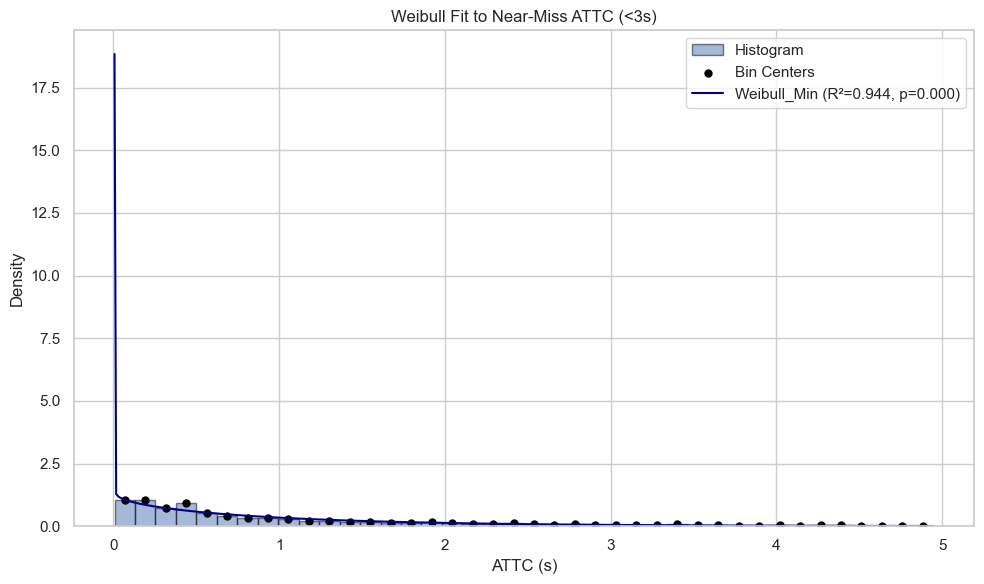

=== Weibull Fit Statistics ===
R²     = 0.9439
p-value= 0.0002
Params = [0.9278 0.0068 0.9934]



In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme, genpareto, weibull_min, expon, kstest

# Step 1: Filter near-miss ATTC data
nearmiss = df[(df['ATTC'] < 5)]['ATTC']

# Step 2: Histogram info
bins = 40
y_obser, bin_edges = np.histogram(nearmiss, bins=bins, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
x_vals = np.linspace(nearmiss.min(), nearmiss.max(), 500)

# R² function
def r2_score(y_pred, y_obs):
    ss_res = np.sum((y_obs - y_pred) ** 2)
    ss_tot = np.sum((y_obs - np.mean(y_obs)) ** 2)
    return 1 - (ss_res / ss_tot) if ss_tot != 0 else np.nan

# Distributions to test
distributions = {
    'Weibull_Min': weibull_min,
    'GenExtreme': genextreme,
    'GenPareto': genpareto,
    'Exponential': expon
}

# Store results
fit_results = {}

for name, dist in distributions.items():
    try:
        # Fit distribution
        params = dist.fit(nearmiss)
        # PDF for bin centers (for R²)
        pdf_at_bins = dist.pdf(bin_centers, *params)
        # PDF for smooth curve
        pdf_at_x = dist.pdf(x_vals, *params)
        # R² score
        r2 = r2_score(pdf_at_bins, y_obser)
        # K-S test (p-value)
        ks_stat, p_val = kstest(nearmiss, dist.cdf, args=params)
        # Store
        fit_results[name] = {
            'params': params,
            'pdf': pdf_at_x,
            'r2': r2,
            'p_val': p_val
        }
    except Exception as e:
        print(f"{name} fitting failed: {e}")

# Step 3: Plot only Weibull_Min
plt.figure(figsize=(10, 6))
plt.hist(nearmiss, bins=bins, density=True, alpha=0.5, edgecolor='black', label='Histogram')
plt.scatter(bin_centers, y_obser, color='black', s=25, label='Bin Centers')

weibull = fit_results['Weibull_Min']
plt.plot(x_vals, weibull['pdf'], color='darkblue',
         label=f"Weibull_Min (R²={weibull['r2']:.3f}, p={weibull['p_val']:.3f})")

plt.title("Weibull Fit to Near-Miss ATTC (<3s)")
plt.xlabel("ATTC (s)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Print summary for Weibull only
print("=== Weibull Fit Statistics ===")
print(f"R²     = {weibull['r2']:.4f}")
print(f"p-value= {weibull['p_val']:.4f}")
print(f"Params = {np.round(weibull['params'], 4)}\n")
